In [1]:
! pip install -q -U bitsandbytes
! pip install -q -U git+https://github.com/huggingface/transformers.git
! pip install -q -U git+https://github.com/huggingface/peft.git
#pip install -q -U git+https://github.com/huggingface/accelerate.git
#current version of Accelerate on GitHub breaks QLoRa
#Using standard pip instead
! pip install -q -U accelerate
! pip install -q -U datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [5]:
from peft import LoraConfig
from transformers import AutoModelForCausalLM
from peft import PeftModel
import torch

base_model_name_or_path = "bigscience/bloom-3b"
repo_name = f"aayushi135/bloom3b_all_task"

config = LoraConfig.from_pretrained(repo_name)

model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
)
model_name = "bigscience/bloom-3b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Load the LoRA model
model = PeftModel.from_pretrained(model, repo_name)   # <-- e
device = torch.device('cuda')
model.to(device)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): BloomForCausalLM(
      (transformer): BloomModel(
        (word_embeddings): Embedding(250880, 2560)
        (word_embeddings_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (h): ModuleList(
          (0-29): 30 x BloomBlock(
            (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
            (self_attention): BloomAttention(
              (query_key_value): lora.Linear(
                (base_layer): Linear(in_features=2560, out_features=7680, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=2560, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=7680, bias=False)
                )
                (lora

In [7]:
batch = tokenizer("nifty50", return_tensors='pt').to("cuda:0")
output_tokens = model.generate(**batch)
len(output_tokens[0])

20

# Weight metrix

In [ ]:
import numpy as np
W = np.random.uniform(-0.8, 0.8, (205, 5))

# predicting sell , purchase or hold

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

In [ ]:
input = (output_tokens[0]).tolist()

In [ ]:
x_add = [ [ i for i in input ] for j in range(0,444739)]
x_add = np.array(x_add)
x_add = x_add.T
x_add

array([[    81,     81,     81, ...,     81,     81,     81],
       [137726, 137726, 137726, ..., 137726, 137726, 137726],
       [  2559,   2559,   2559, ...,   2559,   2559,   2559],
       ...,
       [  3238,   3238,   3238, ...,   3238,   3238,   3238],
       [    15,     15,     15, ...,     15,     15,     15],
       [ 59899,  59899,  59899, ...,  59899,  59899,  59899]])

In [ ]:
x_add[0]

array([81, 81, 81, ..., 81, 81, 81])

In [ ]:
len(input)

20

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Summer /candelstick data/final.csv")
df

,Unnamed: 0,Instrument,Date,Time,Open,High,Low,Close,Balance,Actions,Lots,Current Price
0,0,NIFTY,2017-01-02,09:21,8174.60,8174.90,8167.05,8167.40,7.076408e+05,[-3],-3,8167.40
1,1,NIFTY,2017-01-02,09:22,8167.15,8172.00,8164.40,8171.80,7.076408e+05,[0],-3,8171.80
2,2,NIFTY,2017-01-02,09:23,8171.95,8173.50,8165.70,8168.90,7.076408e+05,[0],-3,8168.90
3,3,NIFTY,2017-01-02,09:24,8169.20,8173.90,8168.25,8168.95,7.076408e+05,[0],-3,8168.95
4,4,NIFTY,2017-01-02,09:25,8169.60,8169.75,8165.30,8169.40,7.076408e+05,[0],-3,8169.40
...,...,...,...,...,...,...,...,...,...,...,...,...
444734,444734,NIFTY,2021-12-31,15:11,17356.45,17357.20,17353.75,17354.65,4.595279e+06,[0],3,17354.65
444735,444735,NIFTY,2021-12-31,15:12,17354.35,17356.25,17352.30,17352.30,4.595279e+06,[0],3,17352.30
444736,444736,NIFTY,2021-12-31,15:13,17353.00,17353.45,17349.65,17350.70,4.595279e+06,[0],3,17350.70
444737,444737,NIFTY,2021-12-31,15:14,17351.20,17357.05,17350.95,17356.55,4.595279e+06,[0],3,17356.55


In [ ]:
df['Actions'] = df['Actions'].apply(lambda x : int(x[1:-1]) )
df

,Unnamed: 0,Instrument,Date,Time,Open,High,Low,Close,Balance,Actions,Lots,Current Price
0,0,NIFTY,2017-01-02,09:21,8174.60,8174.90,8167.05,8167.40,7.076408e+05,-3,-3,8167.40
1,1,NIFTY,2017-01-02,09:22,8167.15,8172.00,8164.40,8171.80,7.076408e+05,0,-3,8171.80
2,2,NIFTY,2017-01-02,09:23,8171.95,8173.50,8165.70,8168.90,7.076408e+05,0,-3,8168.90
3,3,NIFTY,2017-01-02,09:24,8169.20,8173.90,8168.25,8168.95,7.076408e+05,0,-3,8168.95
4,4,NIFTY,2017-01-02,09:25,8169.60,8169.75,8165.30,8169.40,7.076408e+05,0,-3,8169.40
...,...,...,...,...,...,...,...,...,...,...,...,...
444734,444734,NIFTY,2021-12-31,15:11,17356.45,17357.20,17353.75,17354.65,4.595279e+06,0,3,17354.65
444735,444735,NIFTY,2021-12-31,15:12,17354.35,17356.25,17352.30,17352.30,4.595279e+06,0,3,17352.30
444736,444736,NIFTY,2021-12-31,15:13,17353.00,17353.45,17349.65,17350.70,4.595279e+06,0,3,17350.70
444737,444737,NIFTY,2021-12-31,15:14,17351.20,17357.05,17350.95,17356.55,4.595279e+06,0,3,17356.55


In [ ]:
df['Actions'] = df['Actions'].apply(lambda x : -1 if x <0 else x)
df['Actions'] = df['Actions'].apply(lambda x : 1 if x >0 else x)
df['Actions'] = df['Actions'].replace(1,2)
df['Actions'] = df['Actions'].replace(0,1)
df['Actions'] = df['Actions'].replace(-1,0)
df

,Unnamed: 0,Instrument,Date,Time,Open,High,Low,Close,Balance,Actions,Lots,Current Price
0,0,NIFTY,2017-01-02,09:21,8174.60,8174.90,8167.05,8167.40,7.076408e+05,0,-3,8167.40
1,1,NIFTY,2017-01-02,09:22,8167.15,8172.00,8164.40,8171.80,7.076408e+05,1,-3,8171.80
2,2,NIFTY,2017-01-02,09:23,8171.95,8173.50,8165.70,8168.90,7.076408e+05,1,-3,8168.90
3,3,NIFTY,2017-01-02,09:24,8169.20,8173.90,8168.25,8168.95,7.076408e+05,1,-3,8168.95
4,4,NIFTY,2017-01-02,09:25,8169.60,8169.75,8165.30,8169.40,7.076408e+05,1,-3,8169.40
...,...,...,...,...,...,...,...,...,...,...,...,...
444734,444734,NIFTY,2021-12-31,15:11,17356.45,17357.20,17353.75,17354.65,4.595279e+06,1,3,17354.65
444735,444735,NIFTY,2021-12-31,15:12,17354.35,17356.25,17352.30,17352.30,4.595279e+06,1,3,17352.30
444736,444736,NIFTY,2021-12-31,15:13,17353.00,17353.45,17349.65,17350.70,4.595279e+06,1,3,17350.70
444737,444737,NIFTY,2021-12-31,15:14,17351.20,17357.05,17350.95,17356.55,4.595279e+06,1,3,17356.55


In [ ]:
x = df.iloc[:,[4,5,6,7,8,11]]
x

,Open,High,Low,Close,Balance,Current Price
0,8174.60,8174.90,8167.05,8167.40,7.076408e+05,8167.40
1,8167.15,8172.00,8164.40,8171.80,7.076408e+05,8171.80
2,8171.95,8173.50,8165.70,8168.90,7.076408e+05,8168.90
3,8169.20,8173.90,8168.25,8168.95,7.076408e+05,8168.95
4,8169.60,8169.75,8165.30,8169.40,7.076408e+05,8169.40
...,...,...,...,...,...,...
444734,17356.45,17357.20,17353.75,17354.65,4.595279e+06,17354.65
444735,17354.35,17356.25,17352.30,17352.30,4.595279e+06,17352.30
444736,17353.00,17353.45,17349.65,17350.70,4.595279e+06,17350.70
444737,17351.20,17357.05,17350.95,17356.55,4.595279e+06,17356.55


In [ ]:
x_add[0]

[81,
 137726,
 2559,
 17,
 1339,
 17,
 11843,
 18,
 12,
 210,
 59899,
 5789,
 3238,
 24906,
 15,
 59899,
 5789,
 3238,
 15,
 59899]

In [ ]:
for i in range(0,20) :
  name = "col" + str(i)
  x[name] = x_add[i]
x

<ipython-input-69-f61acedc00d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[name] = x_add[i]
<ipython-input-69-f61acedc00d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[name] = x_add[i]
<ipython-input-69-f61acedc00d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Open,High,Low,Close,Balance,Current Price,col0,col1,col2,col3,...,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19
0,8174.60,8174.90,8167.05,8167.40,7.076408e+05,8167.40,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899
1,8167.15,8172.00,8164.40,8171.80,7.076408e+05,8171.80,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899
2,8171.95,8173.50,8165.70,8168.90,7.076408e+05,8168.90,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899
3,8169.20,8173.90,8168.25,8168.95,7.076408e+05,8168.95,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899
4,8169.60,8169.75,8165.30,8169.40,7.076408e+05,8169.40,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444734,17356.45,17357.20,17353.75,17354.65,4.595279e+06,17354.65,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899
444735,17354.35,17356.25,17352.30,17352.30,4.595279e+06,17352.30,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899
444736,17353.00,17353.45,17349.65,17350.70,4.595279e+06,17350.70,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899
444737,17351.20,17357.05,17350.95,17356.55,4.595279e+06,17356.55,81,137726,2559,17,...,59899,5789,3238,24906,15,59899,5789,3238,15,59899


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test  = train_test_split(x,df['Actions'], test_size=0.05, random_state=0)

In [ ]:
def ANN(x_train,x_test,y_train):
  model = Sequential()
  model.add(Dense(20, input_shape=(26,), activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=20, batch_size=10)
  predictions = (model.predict(x_test))
  return predictions

In [ ]:
predictions = ANN(x_train,x_test,y_train)

Epoch 1/20
42251/42251 [==============================] - 161s 4ms/step - loss: 831.7291 - accuracy: 0.9382
Epoch 2/20
42251/42251 [==============================] - 146s 3ms/step - loss: 0.2304 - accuracy: 0.9508
Epoch 3/20
42251/42251 [==============================] - 147s 3ms/step - loss: 0.2304 - accuracy: 0.9508
Epoch 4/20
42251/42251 [==============================] - 158s 4ms/step - loss: 0.2304 - accuracy: 0.9508
Epoch 5/20
42251/42251 [==============================] - 146s 3ms/step - loss: 0.2304 - accuracy: 0.9508
Epoch 6/20
42251/42251 [==============================] - 147s 3ms/step - loss: 0.2304 - accuracy: 0.9508
Epoch 7/20
42251/42251 [==============================] - 147s 3ms/step - loss: 0.2304 - accuracy: 0.9508
Epoch 8/20
42251/42251 [==============================] - 143s 3ms/step - loss: 0.2304 - accuracy: 0.9508
Epoch 9/20
42251/42251 [==============================] - 149s 4ms/step - loss: 0.2304 - accuracy: 0.9508
Epoch 10/20
42251/42251 [===================

In [ ]:
predictions = np.argwhere(predictions==np.amax(predictions,1, keepdims=True))
predictions = np.array(predictions)
predictions = predictions.T
predictions = predictions[1]

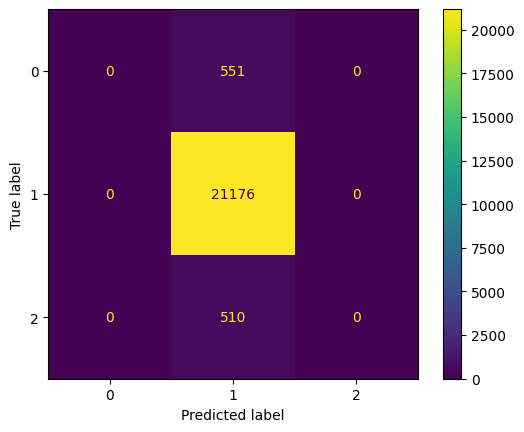

In [ ]:
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy

0.9522867293249989

In [ ]:
precision = metrics.precision_score(y_test, predictions , average='micro')
precision

0.9522867293249989

In [ ]:
Sensitivity_recall = metrics.recall_score(y_test, predictions,average='micro')
Sensitivity_recall

0.9522867293249989

In [ ]:
Specificity = metrics.recall_score(y_test, predictions, pos_label=0,average='micro')
Specificity

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9522867293249989

In [ ]:
F1_score = metrics.f1_score(y_test, predictions,average='micro')
F1_score

0.9522867293249988